In [1]:
import fishing

In [2]:
fishing_env = fishing.harvested_system()

In [3]:
fishing_env.reset()
fishing_env.step(action=[-1])

(array([-1.], dtype=float32), array([0.], dtype=float32), False, False, {})

In [8]:
import dynamics as dyn

simulation = dyn.simulate_dynamics(
    T = fishing_env.max_t,
    params = fishing_env.parameters,
    init_pop = 0.5
)

import pandas as pd

sim_df = pd.DataFrame(simulation)

<Axes: xlabel='t'>

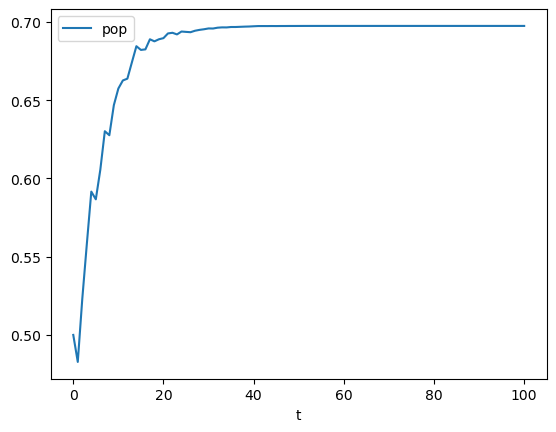

In [9]:
sim_df.plot(x='t')

In [10]:
from stable_baselines3 import PPO

In [27]:
agent = PPO("MlpPolicy", env=fishing_env, verbose=1, tensorboard_log="../../logs")

In [ ]:
agent.learn(total_timesteps = 250_000)

In [ ]:
# plot the policy
import numpy as np
import pandas as pd

policy_data = {
    'population': [],
    'harvest_intensity': [],
}

fishing_env.reset()
for pop in np.linspace(0, 0.8):
    fishing_env.pop = np.array([pop], dtype=np.float32)
    obs = fishing_env.observe()
    action = agent.predict(obs)
    harvest_intensity = fishing_env.compute_harvest(action)[0]
    policy_data['population'].append(pop)
    policy_data['harvest_intensity'].append(harvest_intensity)

policy_df = pd.DataFrame(policy_data)

In [ ]:
policy_df.plot(x='population')

In [13]:
from stable_baselines3.common.evaluation import evaluate_policy

In [15]:
rewards, ep_lengths = evaluate_policy(model = agent, env = fishing_env, n_eval_episodes=50, return_episode_rewards=True)